# SC1015 Mini-Project

Group: 2, FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H

### Essential Libraries

Let us begin by importing the essential Python Libraries for Data Extraction and Cleaning.

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

### Import the Dataset

We will be importing our clean_data.csv dataset that we previously saved.\
Dataset is a cleaned version of [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 


In [2]:
# # Importing our dataset
clean_data = pd.read_csv("clean_data.csv")

#Printing our dataset to take a peek at it's initial state
print("Data dimensions:", clean_data.shape)

clean_data

Data dimensions: (943, 16)


,Unnamed: 0,index,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,electrocardiograph,max_heart_rate,induced_angina,st_depression,slope,flourosopy_vessel,defect,heart_disease
0,0,0,52,1,0,125,212,0,1,168,0,0.343210,2,2,3,0
1,1,1,53,1,0,140,203,1,0,155,1,1.516981,0,0,3,0
2,2,2,70,1,0,145,174,0,1,125,1,1.329025,0,0,3,0
3,3,3,61,1,0,148,203,0,1,161,0,-1.168209,2,1,3,0
4,4,4,62,0,0,138,294,1,1,106,0,0.993572,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,938,1020,59,1,1,140,221,0,1,164,1,-1.168209,2,0,2,1
939,939,1021,60,1,0,125,258,0,0,141,1,1.408378,1,1,3,0
940,940,1022,47,1,0,110,275,0,0,118,1,0.343210,1,1,2,0
941,941,1023,50,0,0,110,254,0,0,159,0,-1.168209,2,0,2,1


### Splitting our dataset

Before we begin to analyse our data, let us split our dataset into train and test sets. We do this before analysis so that we have no knowledge of our test set to work with, making the use of our test set later better predictor of how well our models did in comparison to our initial data analysis.

We chose a 80:20 Train-Test split as a starting point, we can tweak this later on if necessary. We cant make our Train Set any smaller because our dataset is relatively small (n<1000), making each observation more valuable and cant be spared for the Test Set. On the other hand we cant make our Test set any smaller because we wouldnt have a sufficient validation set to test our models on.

For consistency, random_state will be set to 42.

In [3]:
# Importing the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data into predictors and response
X = clean_data.drop(["heart_disease"], axis = 1)
y = clean_data["heart_disease"]

# random_state 42 for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Combining our train sets and getting rid of the first 2 columns containing the reindex and original index
train_data = pd.concat([X_train, y_train], axis=1)
train_data = train_data.iloc[:, 2:]

train_data

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,electrocardiograph,max_heart_rate,induced_angina,st_depression,slope,flourosopy_vessel,defect,heart_disease
244,58,1,2,132,224,0,0,173,0,1.550725,2,2,3,0
82,62,0,0,124,209,0,1,163,0,-1.168209,2,0,2,1
316,62,0,2,130,263,0,1,97,0,0.519557,1,1,3,0
350,51,1,2,110,175,0,1,123,0,-0.097518,2,0,2,1
465,54,1,0,110,206,0,0,108,1,-1.168209,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,61,0,0,145,307,0,0,146,1,0.343210,1,0,3,0
270,58,1,0,150,270,0,0,111,1,0.140113,2,0,3,0
860,56,1,1,120,240,0,1,169,0,-1.168209,0,0,2,1
435,58,1,0,128,216,0,0,131,1,1.149971,1,3,3,0


### Numerical vs Categorical

In order to do further analysis, we will be splitting our variables between the Numerical and Categorical ones

In [4]:
#Splitting out dataset into categorical and numerical variables
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "electrocardiograph", "induced_angina", "slope", "flourosopy_vessel",
           "defect", "heart_disease"]
num_var = [var for var in clean_data.columns if var not in cat_var]

# We want to ignore the indexes
num_var = num_var[2:]

### Response Variable

Firstly, let us explore our response variable

C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


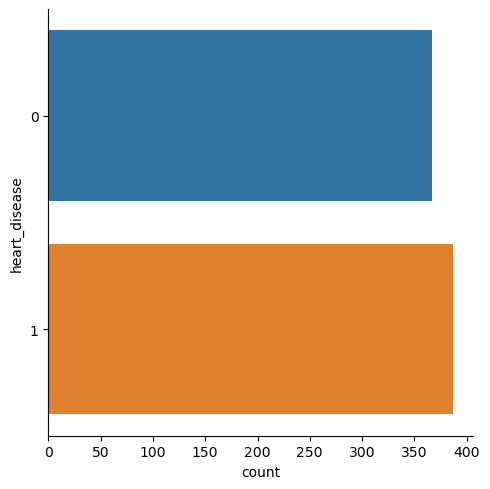

In [5]:
sb.catplot(y = "heart_disease", data = train_data, kind = "count")

### Response Variable Observations

We can see that there is an even distribution between those that have heart_disease and those that do not. This makes our dataset useful as there wont be any imbalance that may affect our confusion matrix later on.

### Statistical Summary

Lets take a look at the statistical summary of our numerical variables

In [6]:
#Statistical summary of the data that we will be dealing with
num_train_data = train_data[num_var]
num_train_data.describe().round(2)

,age,blood_pressure,cholestoral,max_heart_rate,st_depression
count,754.00,754.00,754.00,754.00,754.00
mean,54.40,129.90,244.08,148.86,-0.00
std,9.17,15.64,45.87,22.86,1.00
min,29.00,94.00,126.00,88.00,-1.17
25%,47.00,120.00,211.00,132.00,-1.17
50%,56.00,130.00,240.00,152.00,0.14
75%,61.00,140.00,276.00,166.00,0.81
max,77.00,170.00,360.00,202.00,1.88


### Statistical Summary Observations

Based on the statistical summary observations, we can see that the standard deviation of `cholestoral` (45.87) and `max_heart_rate` (22.86) are quite large, indicating great variance among people in these categories. This may mean that these factors could be useful distinguishing factors to determine whether someone has a `heart_disease`. We shall explore more further on. We can also see that the median `age` (56.00) and mean `age` (54.5) are relatively old. This could be something to keep in mind later on.

### Categorical Summary 

Lets take a look at the statistical summary of our categorical variables

In [7]:
cat_train_data = train_data[cat_var].astype('category')
cat_train_data.describe()

,sex,chest_pain,fasting_blood_sugar,electrocardiograph,induced_angina,slope,flourosopy_vessel,defect,heart_disease
count,754,754,754,754,754,754,754,754,754
unique,2,4,2,3,2,3,4,3,2
top,1,0,0,0,0,1,0,2,1
freq,522,365,651,377,507,355,429,416,387


### Categorical Summary Observations

Based on the categorical summary observations, we can see that most people are not suffering from any of the categorical variables except for `slope` (top=1) and `defect` (top=2). This could possible indicate that these are useful predictors for predicting our `heart_disease` later on. We shall further explore this in the following cells.

### Further Visualisations, Numerical Variables

To further explore how each numerical variable might affect our `heart_disease`, lets plot the strip plots of our numerical variables against our response variable `heart_disease`. We use a stripplot instead of a swampplot due to size constraints

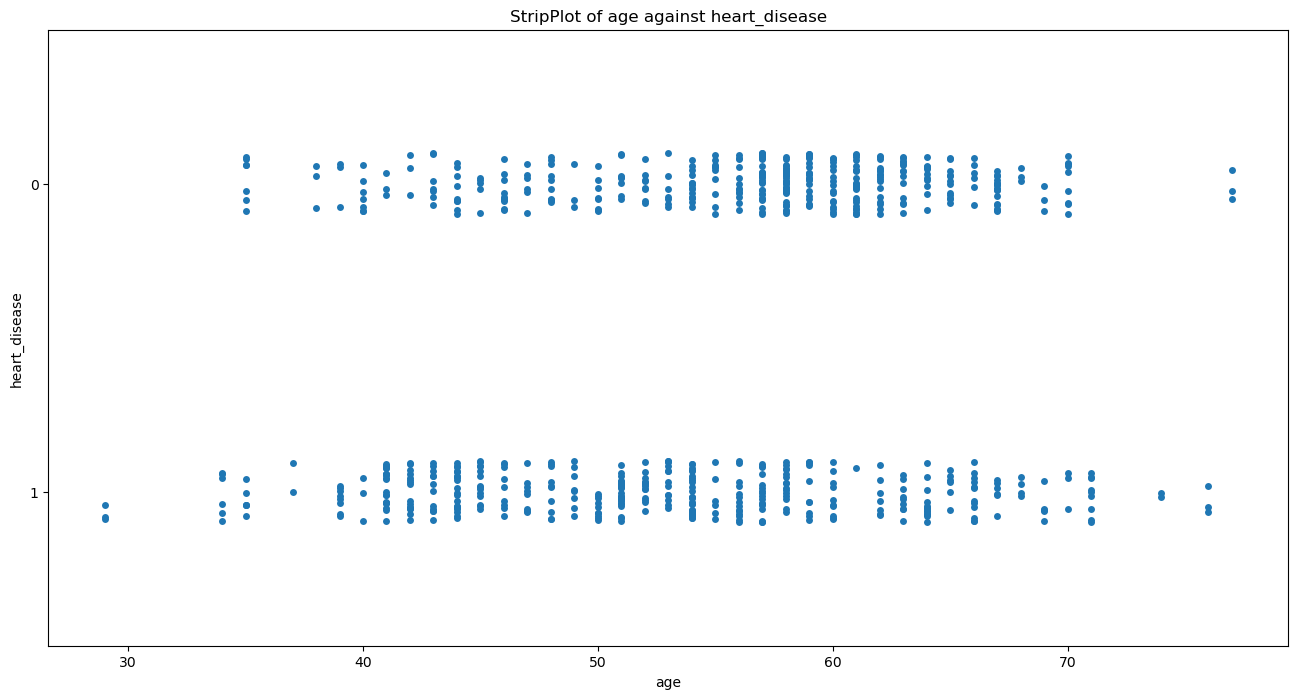

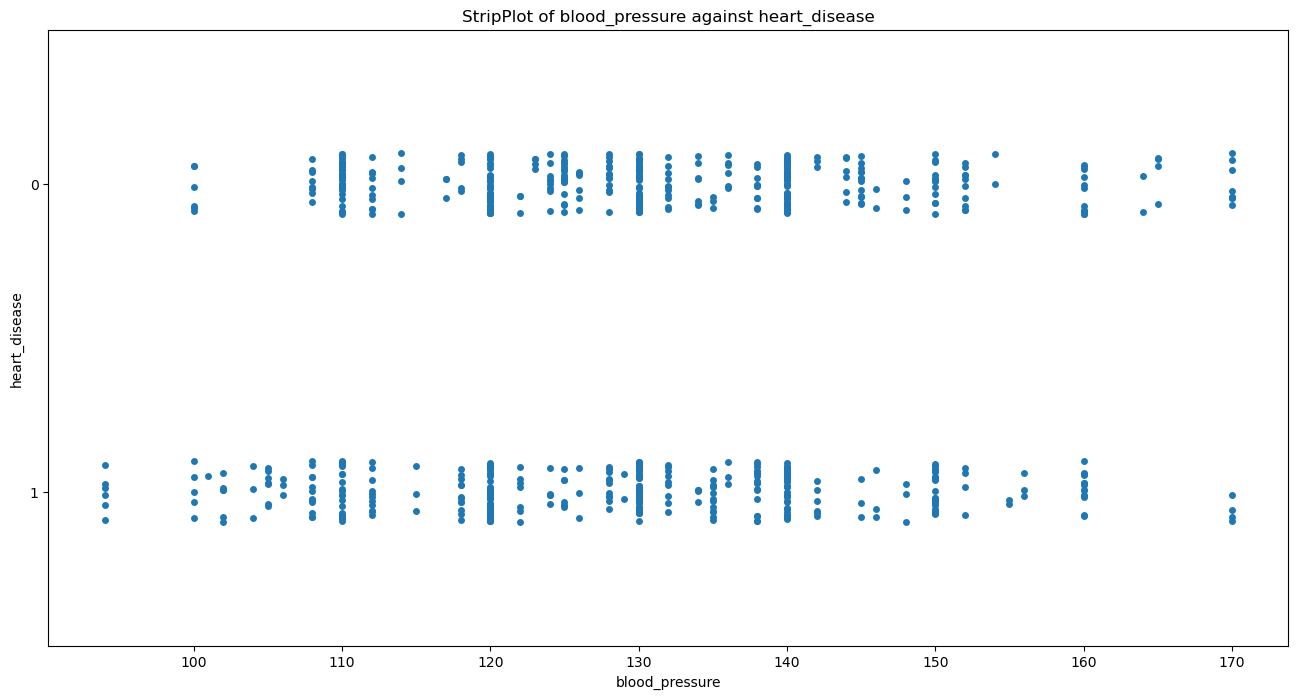

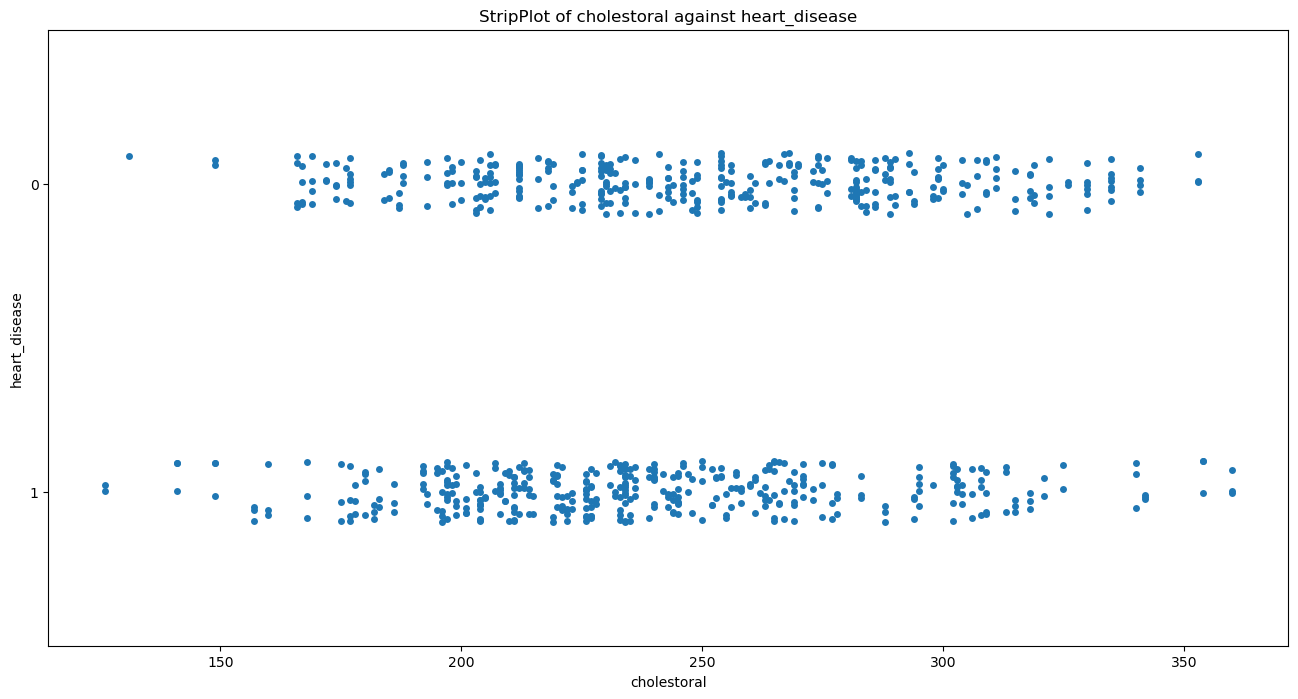

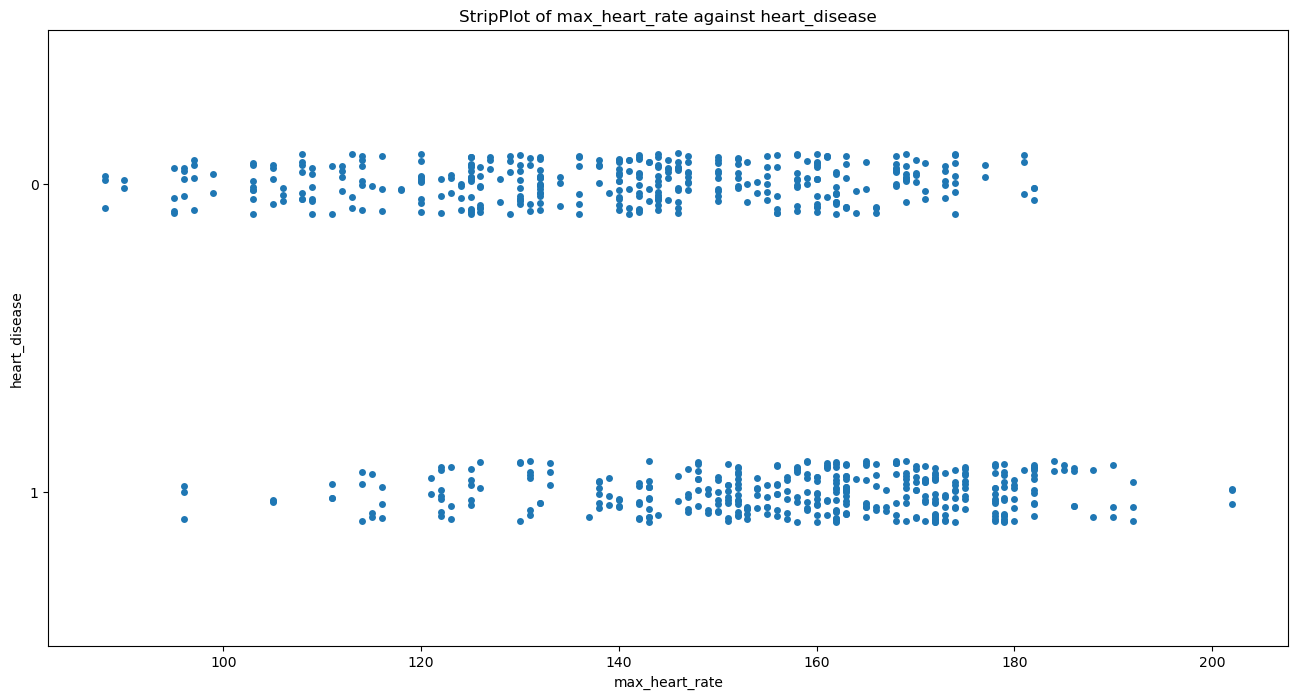

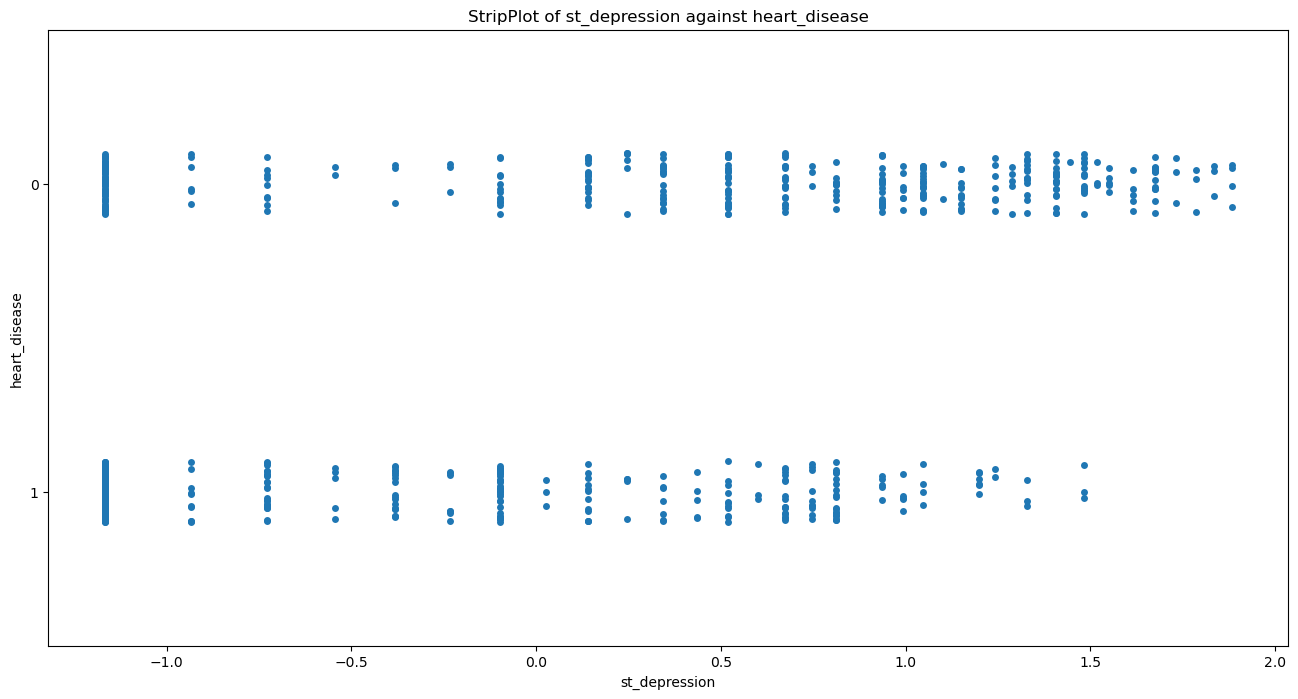

In [8]:
for var in num_var:
    f = plt.figure(figsize=(16, 8))
    
    # Create a strip plot for the current numerical variable
    sb.stripplot(x=train_data[var], y=train_data["heart_disease"].astype('category'))
    plt.xlabel(var)
    plt.ylabel("heart_disease")
    plt.title(f'StripPlot of {var} against heart_disease')  # Set the title
    plt.show() 


### Stripplot Observations

Based on the observations of the stripplots above, we can see that most of them similar plots for both `heart_disease` and no `heart_disease`. However there are a few key observations to be made. We can see that the plots of `st_depression` against `heart_disease` and `max_heart_rate` against `heart_disease` is slightly different on the right side of the plots. Analysing the plots, we can deduce that those who have a `max_heart_rate` of >\~180 are certain to have `heart_disease`. Likewise, we can deduce that people who have `st_depression` >\~1.5 do not have `heart_disease`. Keeping this in mind, `st_depression` and `max_heart_rate` may be useful variables for predicting `heart_disease` later on.

### Further Visualisations, Categorical Variables

To further explore how each categorical variable might affect our `heart_disease`, lets plot a heatmap between each individual categorical variable and `heart_disease`.

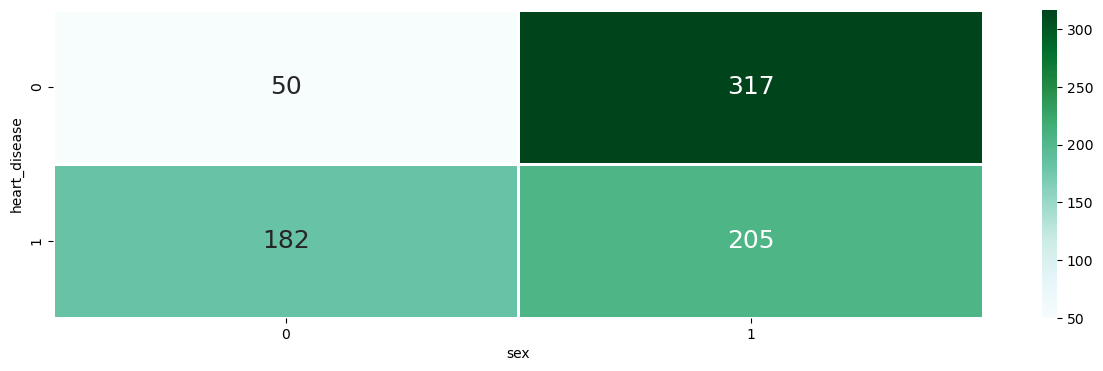

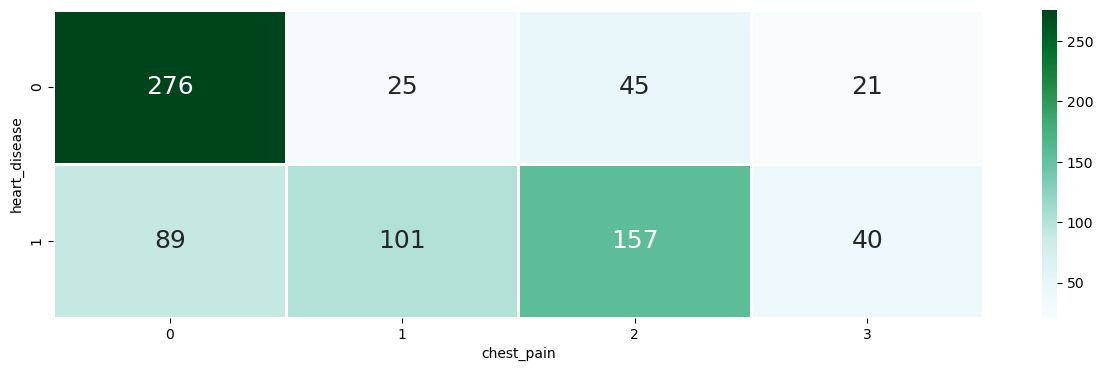

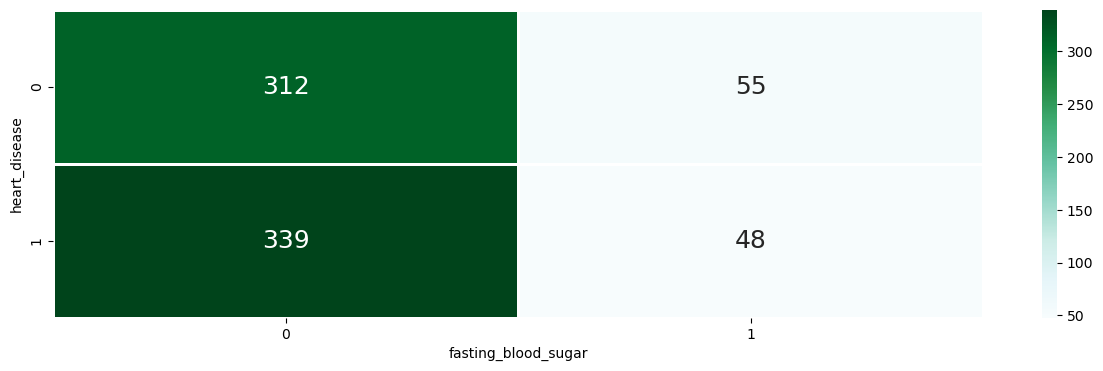

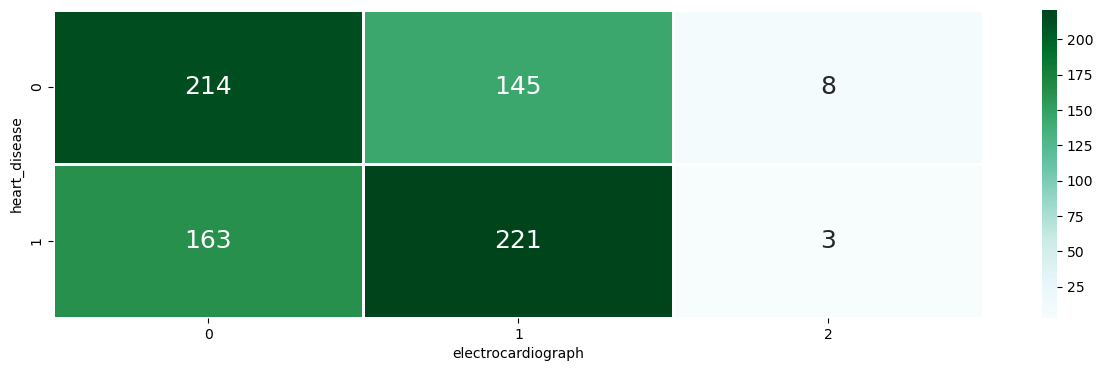

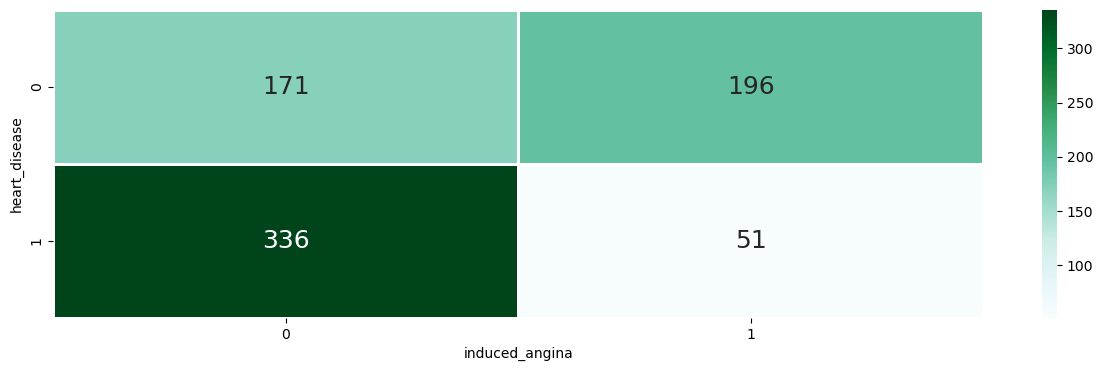

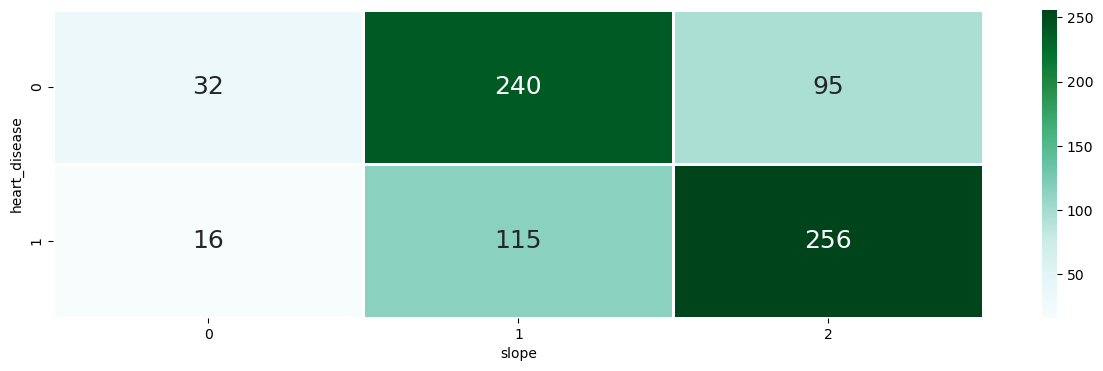

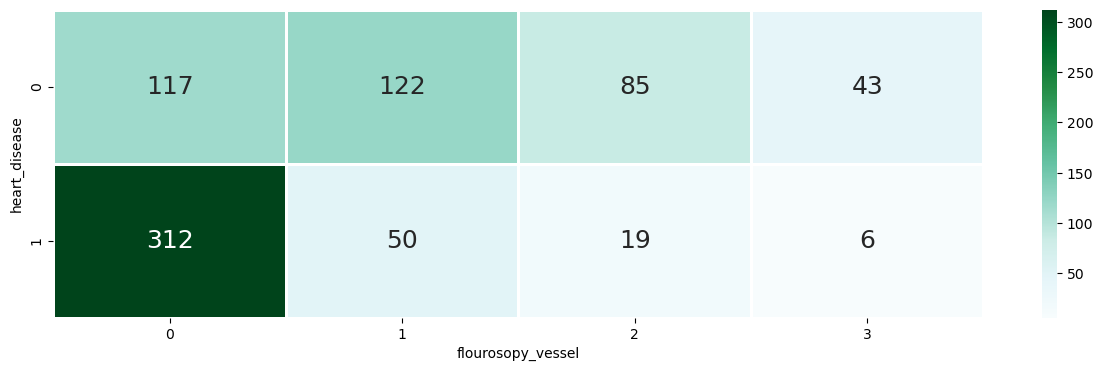

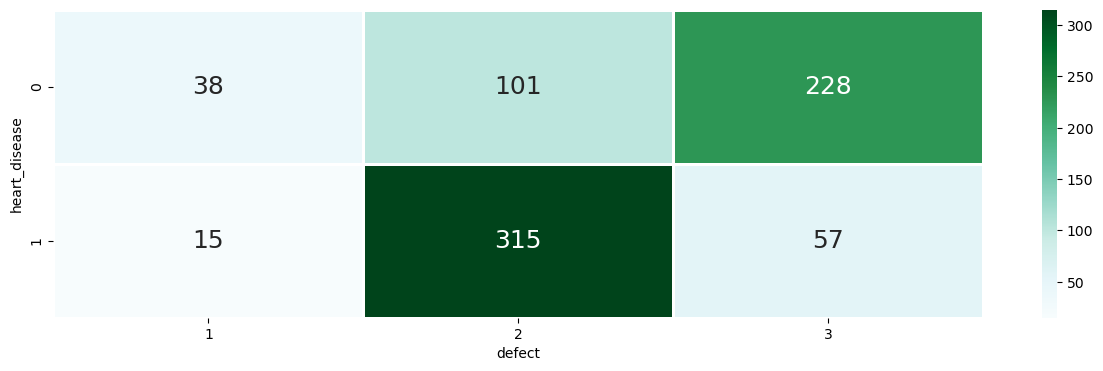

In [9]:
# Dont need to plot heart_disease against itself
for var in cat_var[:-1]:
    f = plt.figure(figsize=(15, 4))
    
    # Create a heatmap for the current categorical variable
    sb.heatmap(train_data.groupby(['heart_disease', var]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Heatmap Observations

We will be using a Greenscheme for our heatmap. The darker the shade of green, the more datapoints there are in that category. When analysing each heatmap, we want to compare the disparity for each occurance of every variable between those that have `heart_disease` and those that do not. A huge disparity in any occurance of a variable might indicate that that variable could be a useful predictor in predicting `heart_disease`. Based on our observations of the above heatmaps, a few key points stand out. Based on our observations of the above heatmaps, a few key points stand out are
> 1. Those who have any form of `chest_pain` are much more likely to have `heart_disease`
2. Having a `slope` of value 2 greatly increases ur chance of having `heart_disease` as compared to the value of 1
3. Having a `flourosopy_vessel` value of 0 greatly increases ur chance of having `heart_disease`
4. Having a `defect` value of 2 greatly increases ur chance of having `heart_disease`

### Complex Relationships with Rating

Let's try to explore slightly more complex bi-variate relationships of predictors with `heart_disease`, and see if we can observe something more interesting. We will be using the key variables identified from our further visualisations earlier.

### Complex Relationships, Numerical Variables

The 2 numerical variables that we identified to be key are `max_heart_rate` and `st_depression`. Lets observe in greater detail through a scatterplot.

<Axes: xlabel='max_heart_rate', ylabel='st_depression'>

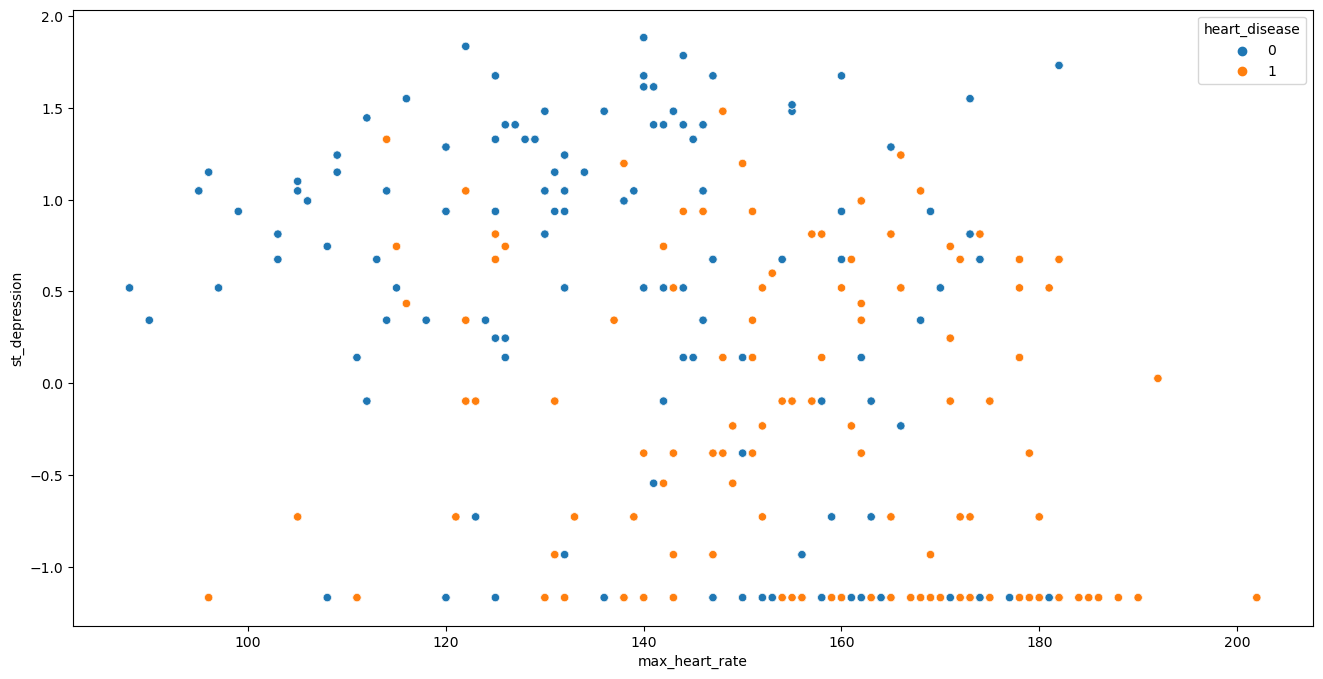

In [10]:
# heart_disease vs max_heart_rate and st_depression
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = train_data["max_heart_rate"], y = train_data["st_depression"], hue = train_data["heart_disease"])

### Complex Relationships, Numerical Variables Observations

Based on the scatterplot above, we can see that the majority of the yellow dots representing `heart_disease` lies to the bottom right of the plot. This means that having a high `max_heart_rate` and low `st_depression` could be a useful indicator in determining `heart_disease`. This reaffirms our prior observations as well.

### Complex Relationships, Categorical Variables

The 4 categorical variables that we identified to be key are `chest_pain`, `slope`, `flourosopy_vessel`, `defect`. We previously also identified `age` as a possible predictor based on domain knowledge and the statistical summary earlier. Lets observe in greater detail through catplots.

C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


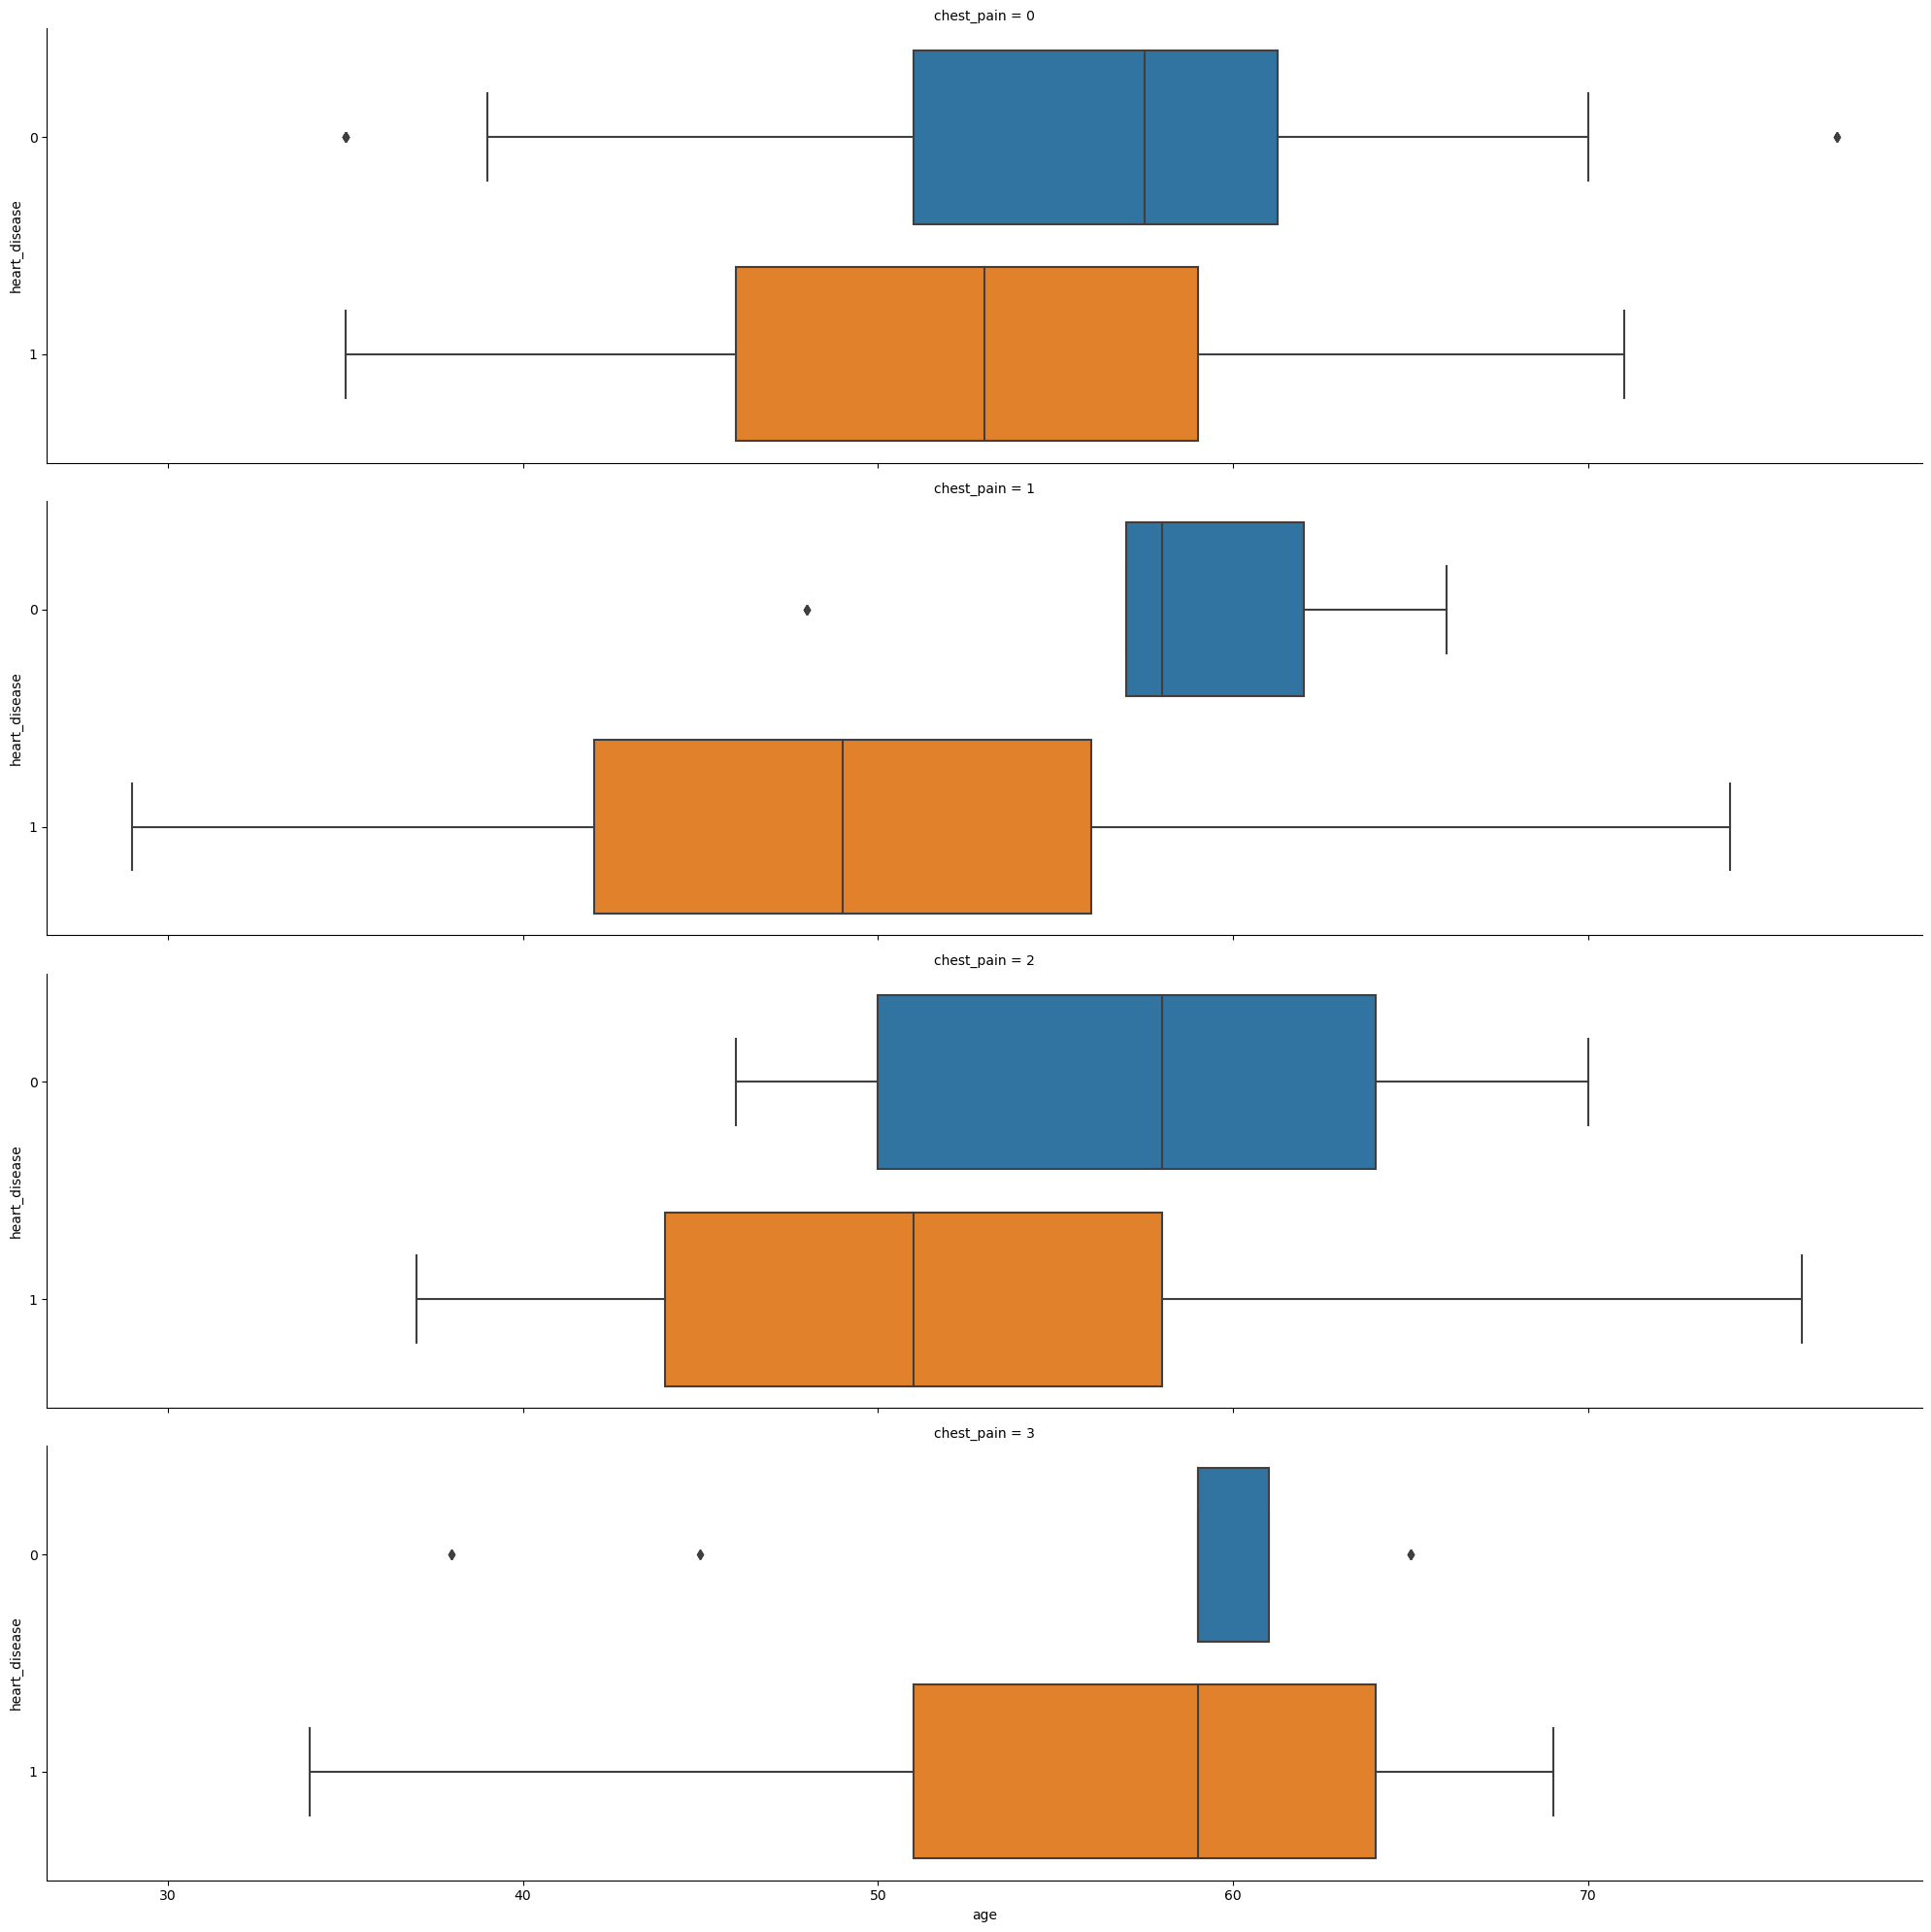

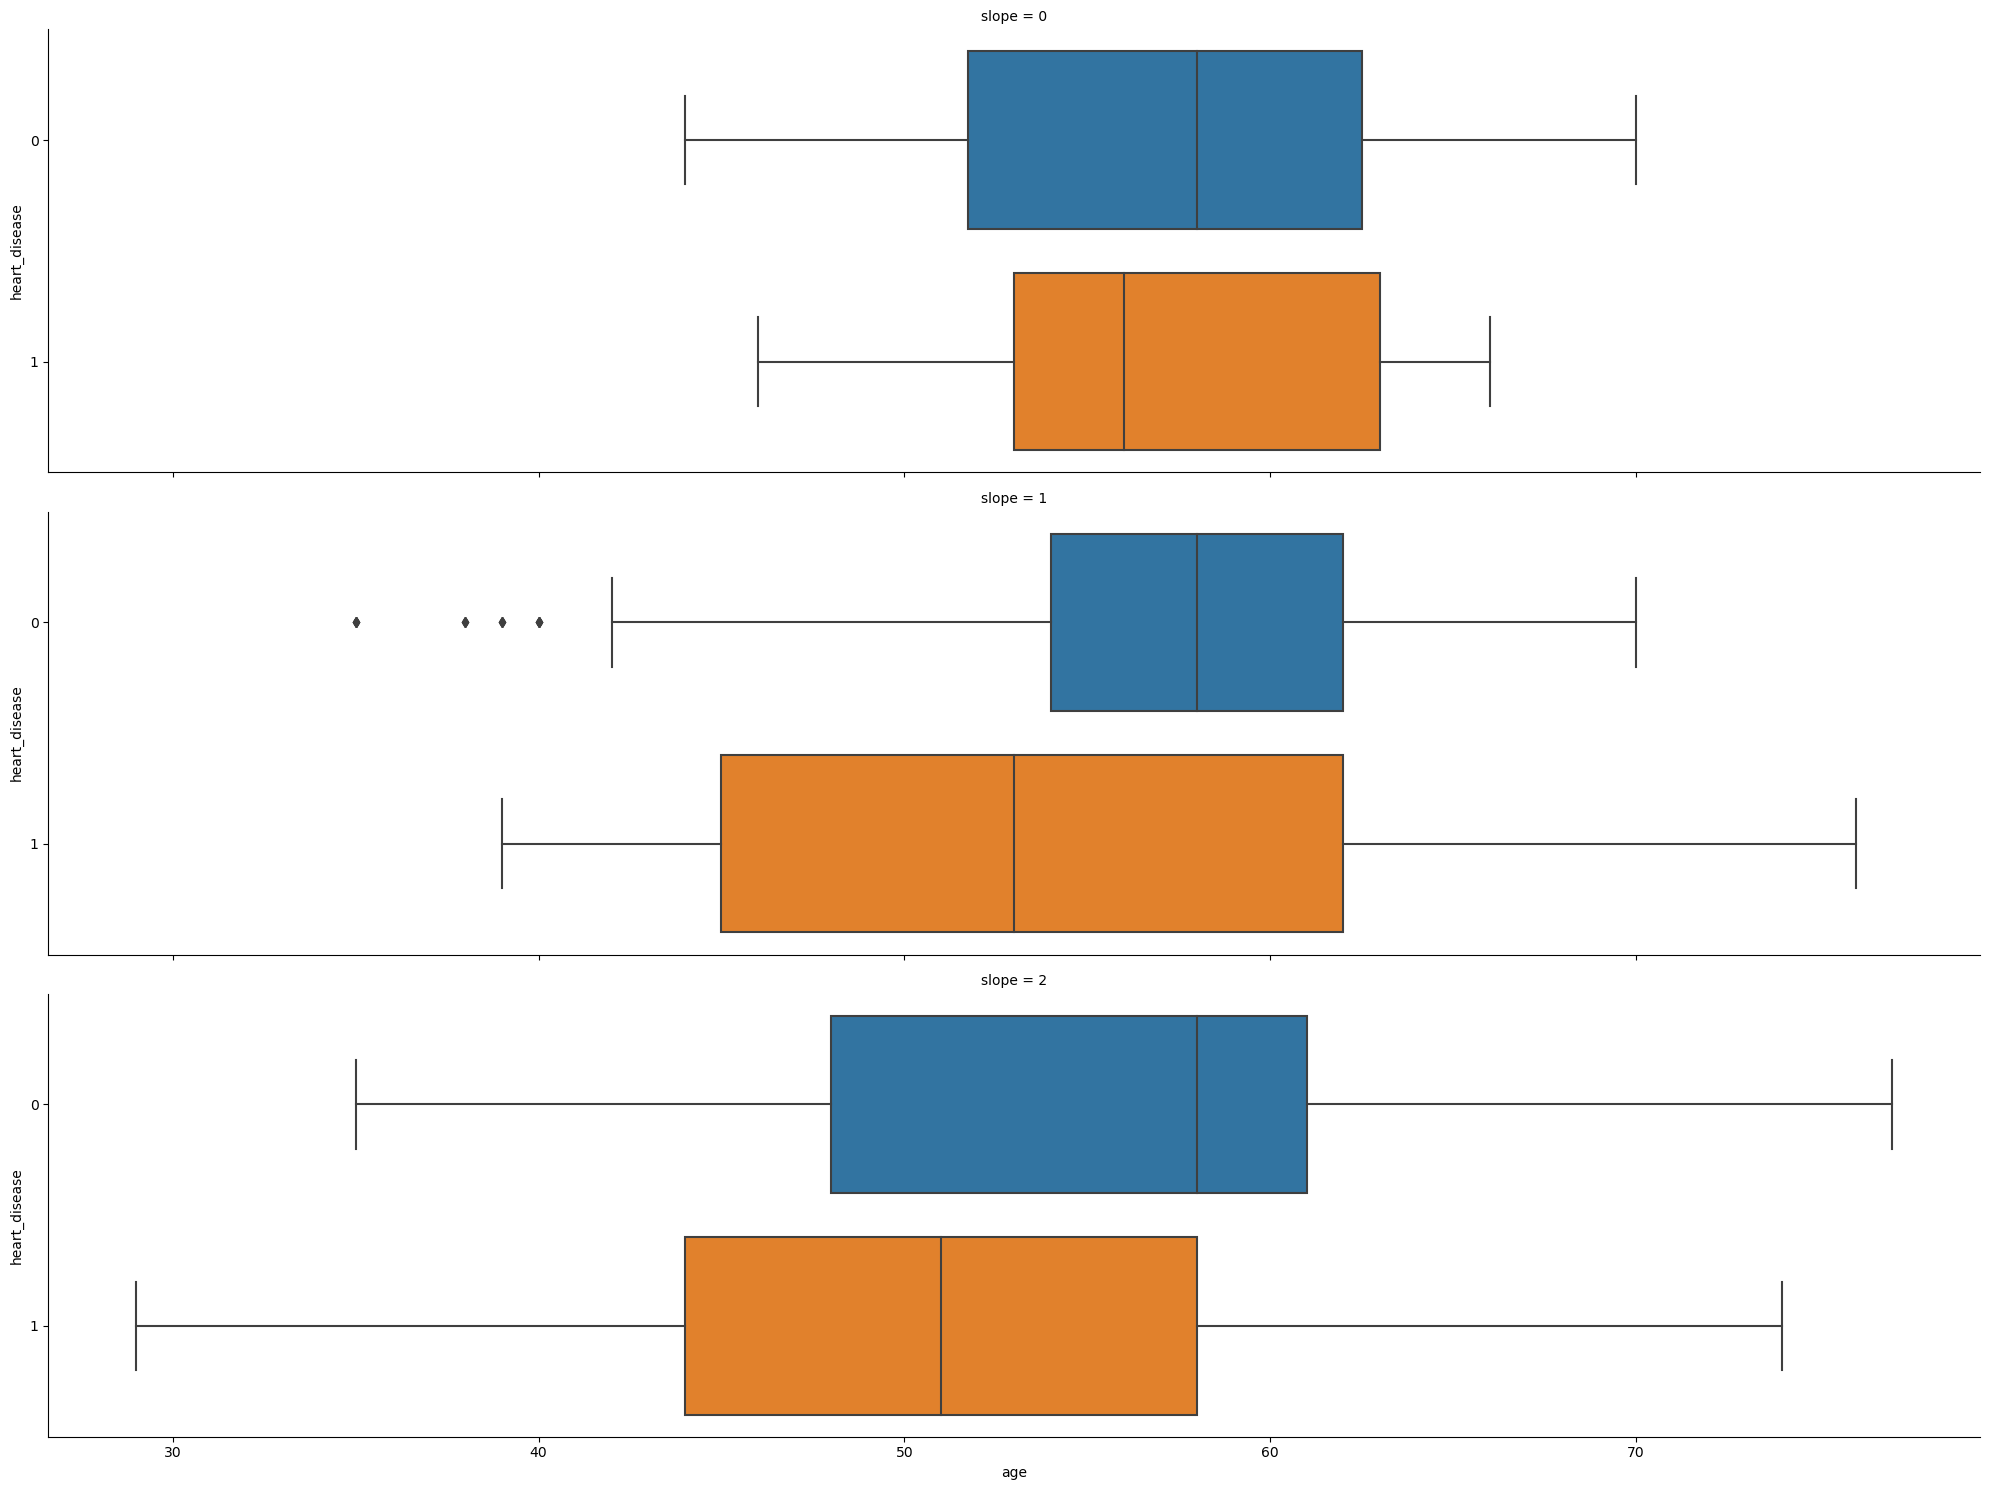

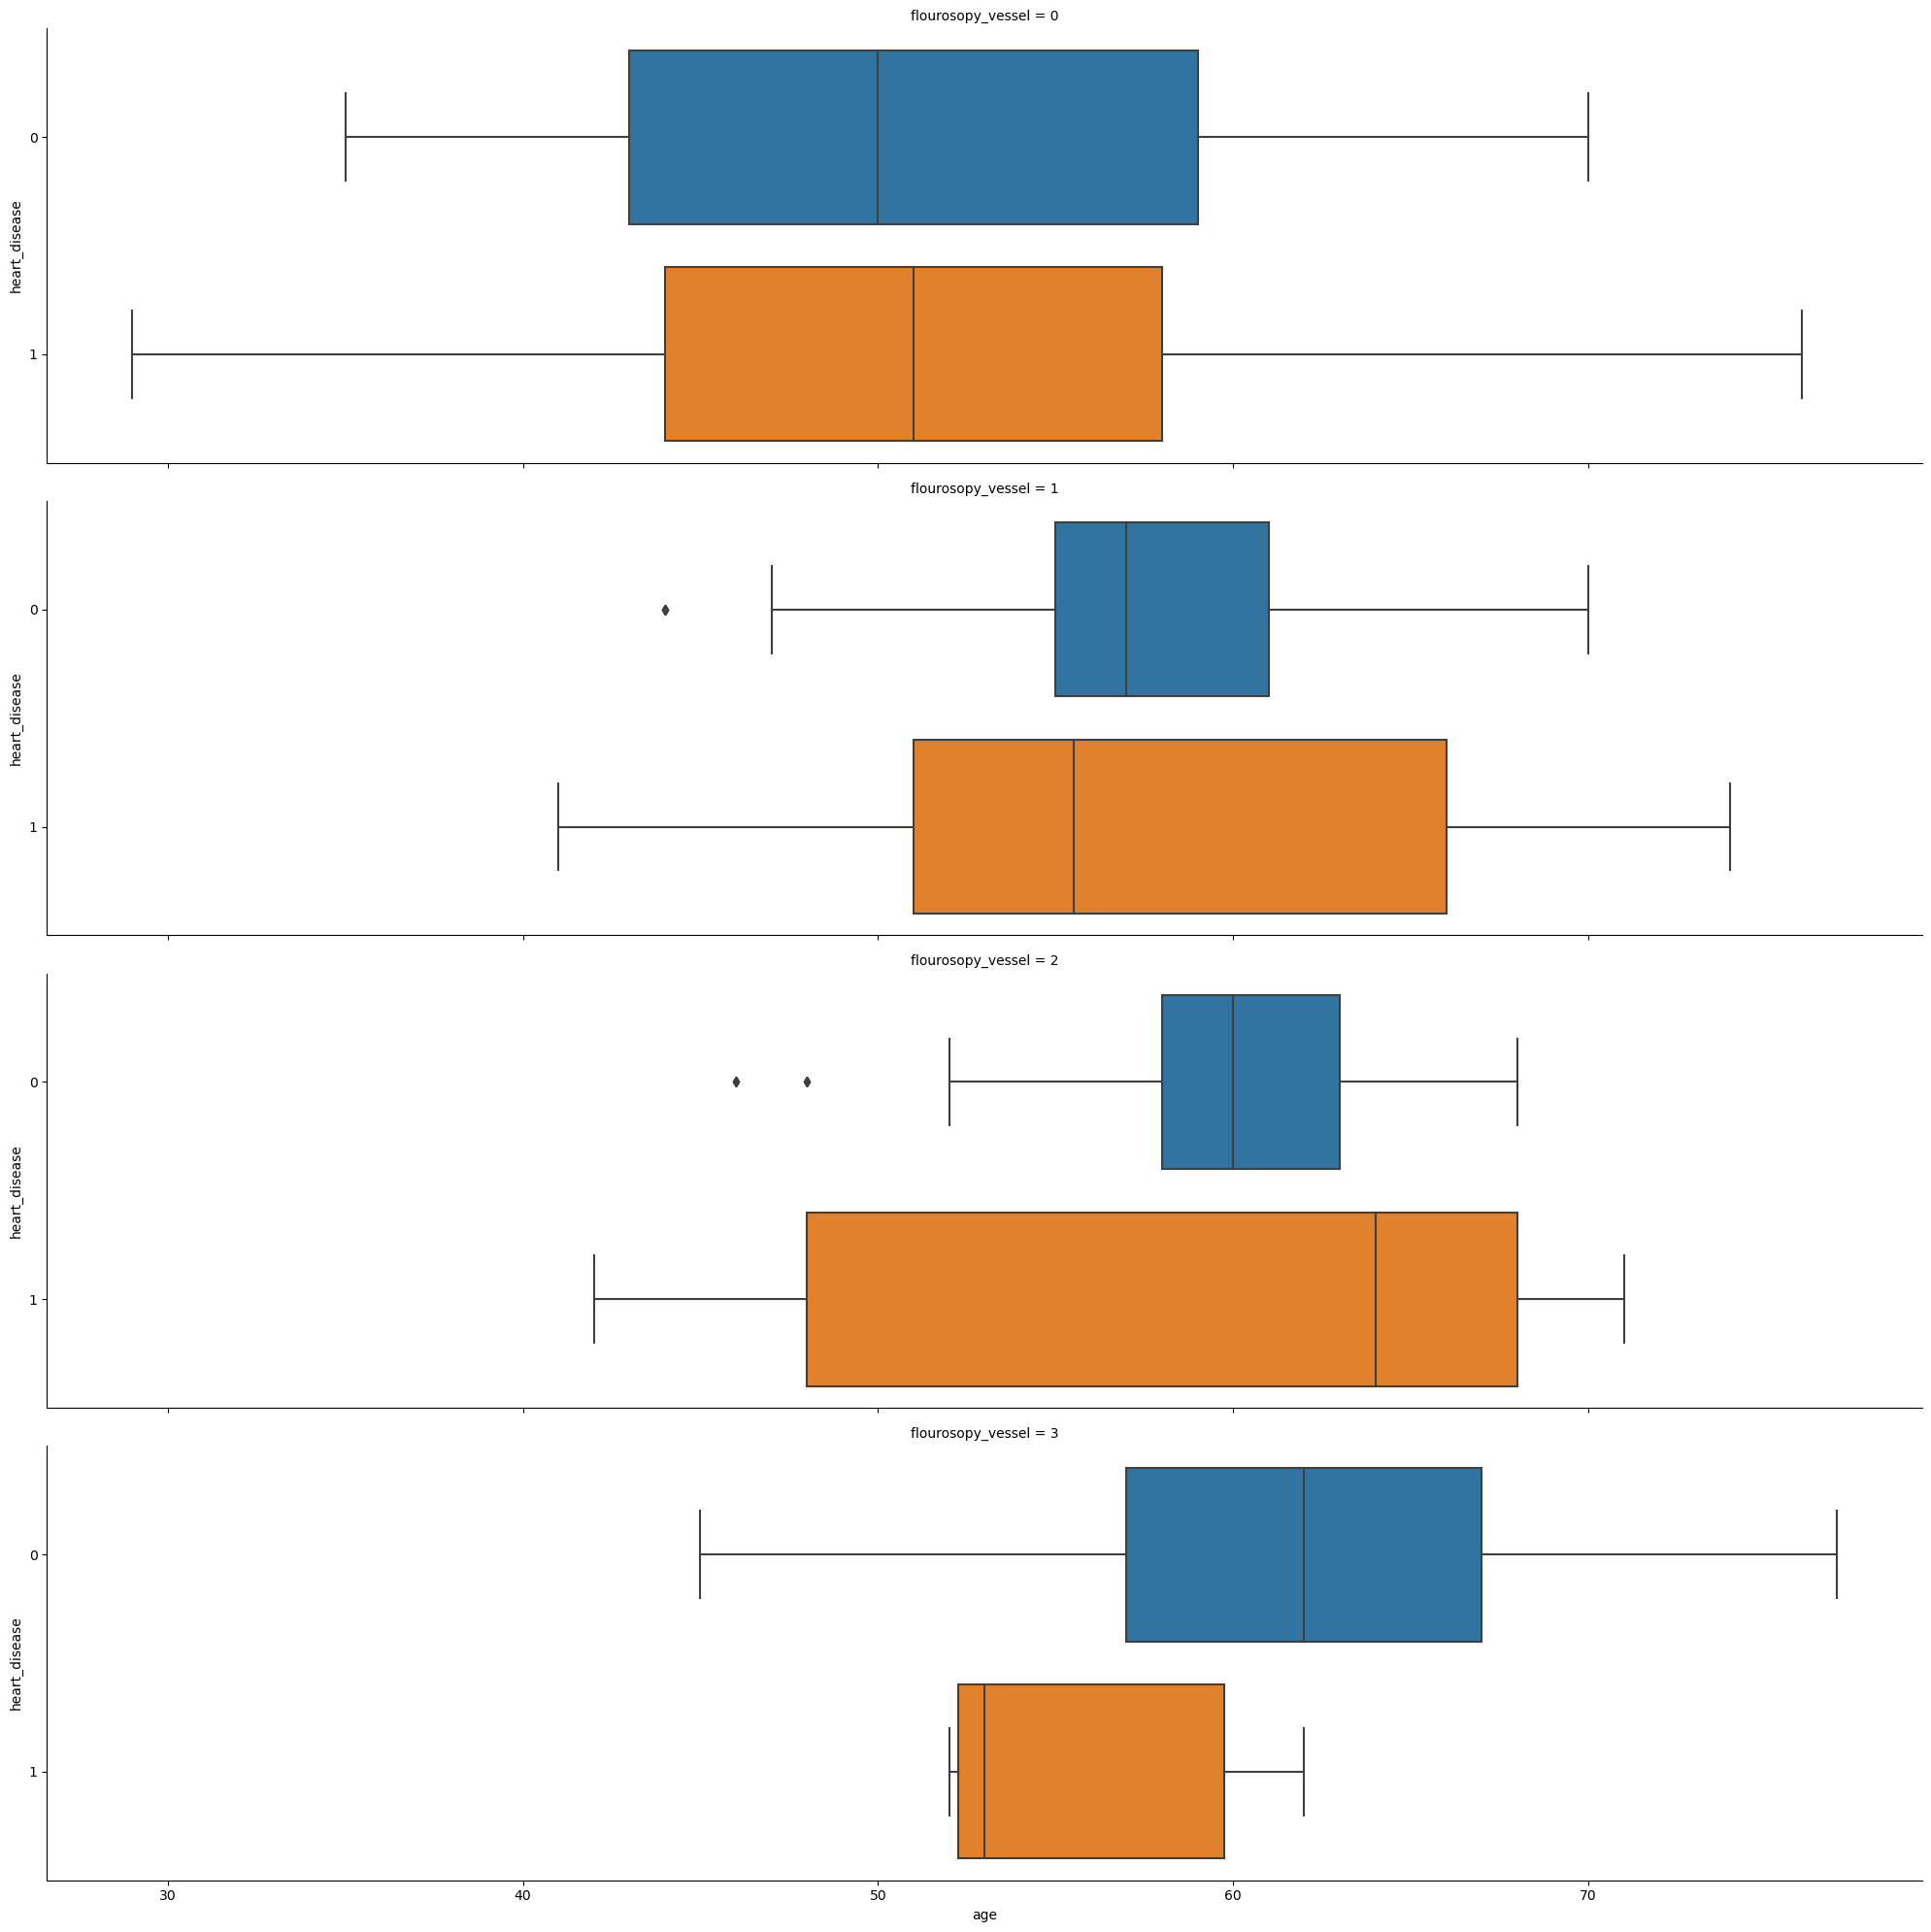

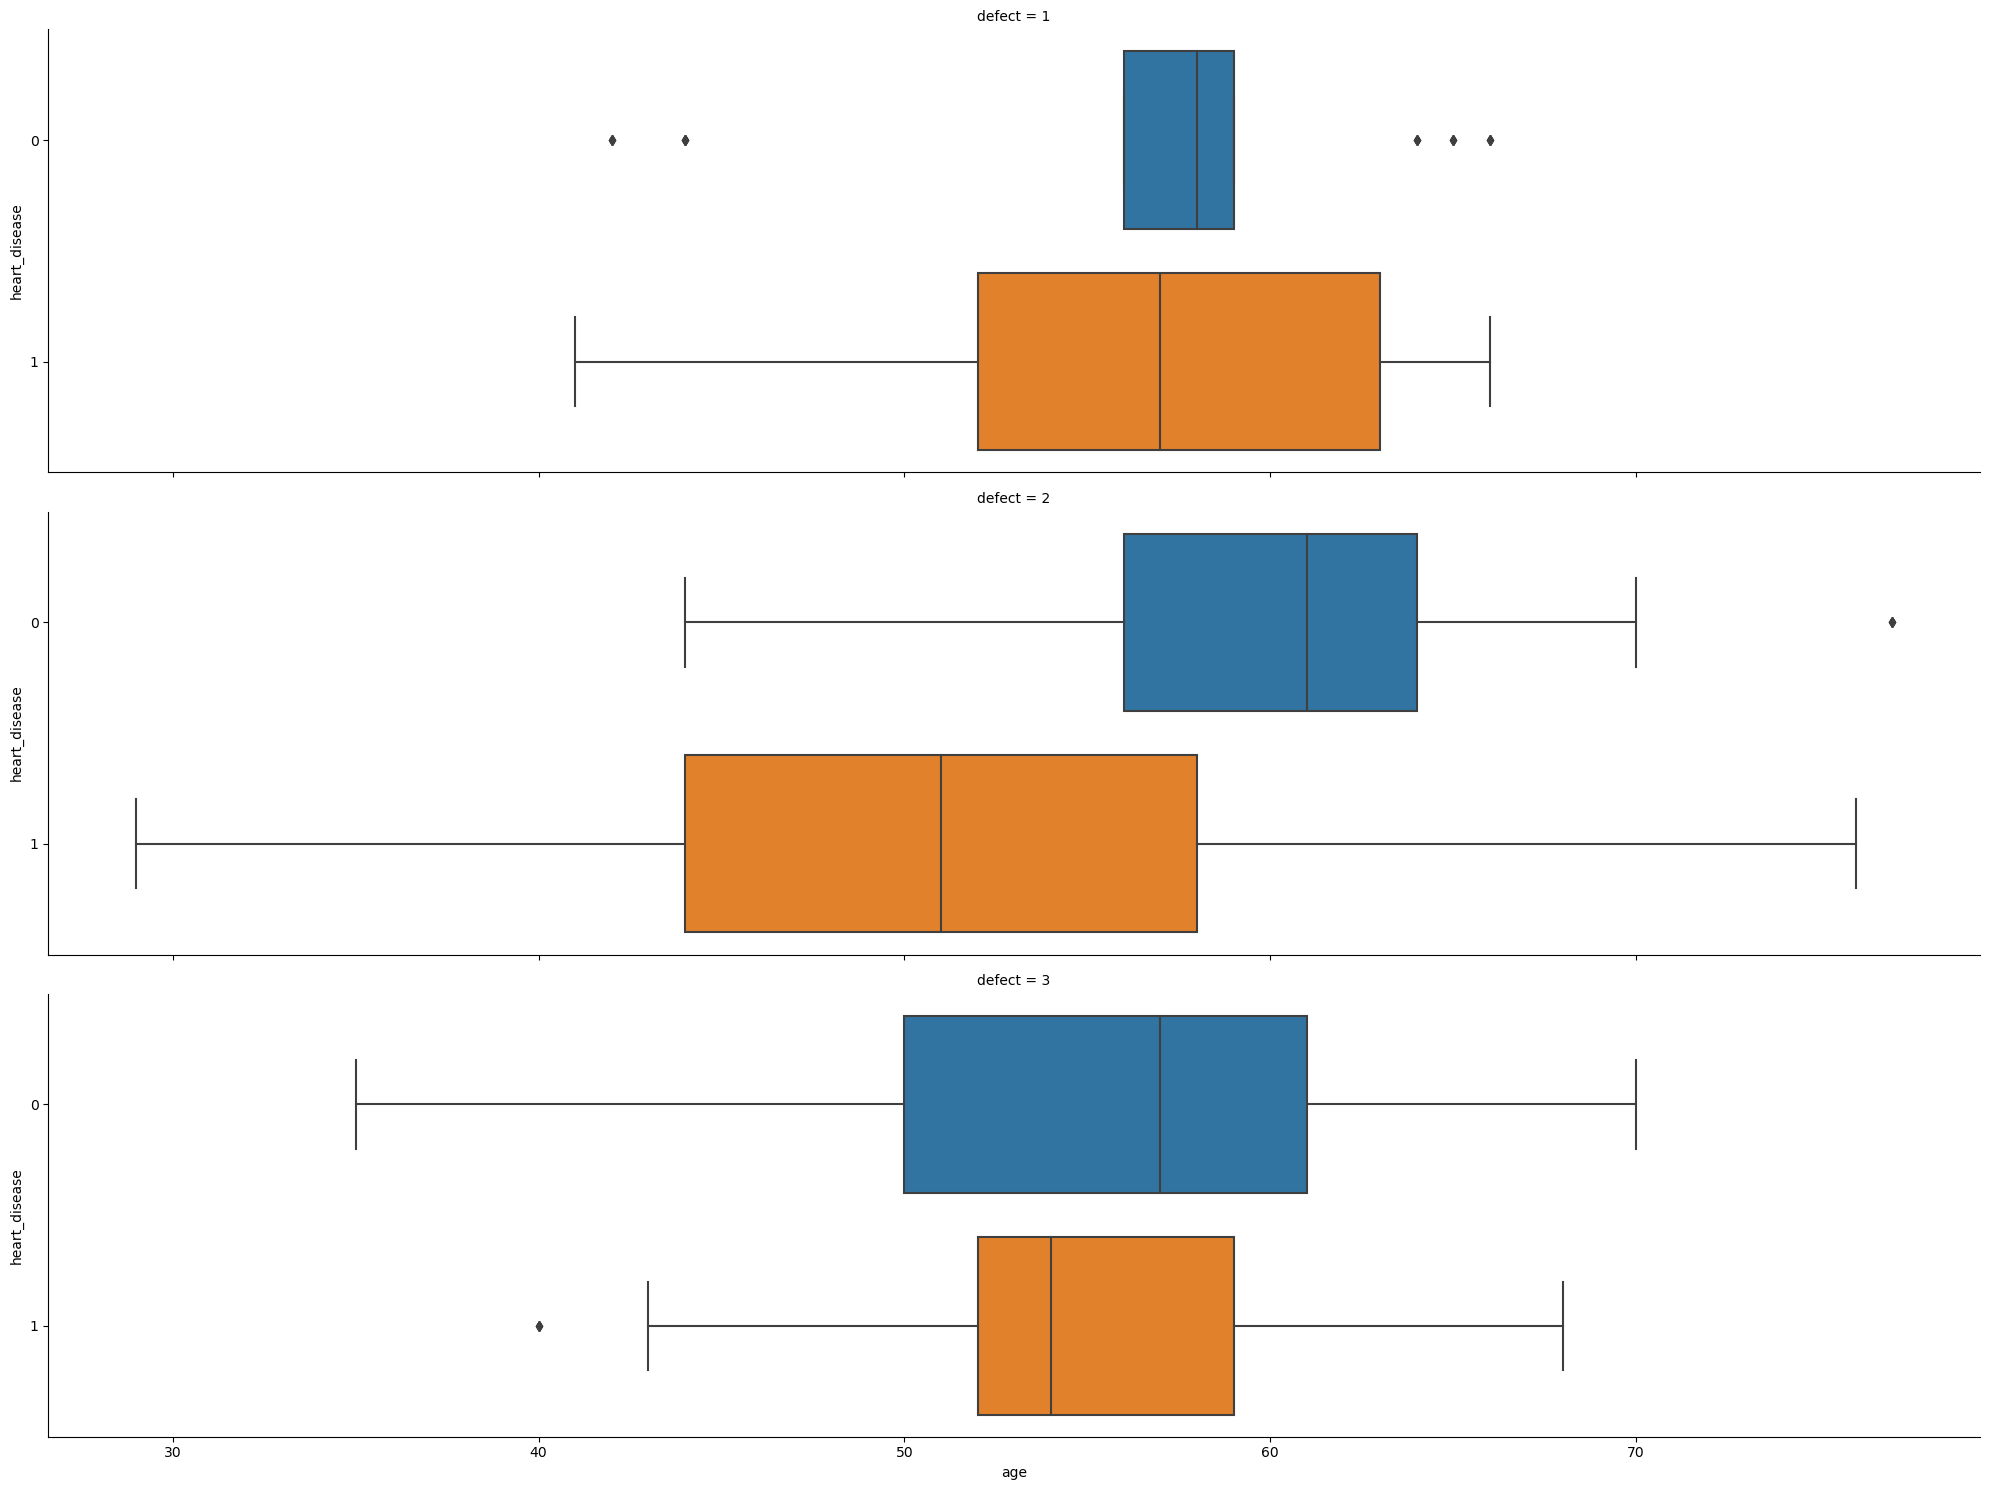

In [11]:
#Seaborn not recognisng my categorical variables properly
train_data["heart_disease"] = train_data["heart_disease"].astype("category")
sb.catplot(x = "age", y = "heart_disease", row = "chest_pain", data = train_data, kind = 'box', aspect = 4)
sb.catplot(x = "age", y = "heart_disease", row = "slope", data = train_data, kind = 'box', aspect = 4)
sb.catplot(x = "age", y = "heart_disease", row = "flourosopy_vessel", data = train_data, kind = 'box', aspect = 4)
sb.catplot(x = "age", y = "heart_disease", row = "defect", data = train_data, kind = 'box', aspect = 4)

### Complex Relationships, Categorical Variables Observations

Based on our catplots above, we can see that most of the blue boxplots tend to be on the right side as compared to the orange boxplot which means that those who have a higher `age` doesnt necessarily mean that they have a higher probability of having `heart_disease`. This goes against our assumed domain knowledge and should be something that we should include in our models to find out more as a possible useful predictor of `heart_disease`.

### Concluding Observations

Overall, in our initial summary observations, we determine that `cholestoral`, `max_heart_rate`, `age`, `slope` and `defect` could be useful predictors of `heart_disease`

Through our further analysis later on, we also concluded that `st_deperession`, `max_heart_rate`, `chest_pain`, `slope`, `flourosopy_vessel`and `defect` could be useful predictors of `heart_disease`. 

As such, we will be testing each of our models through 3 iterations. 
> 1. With every variable
2. With `cholesterol`, `max_heart_rate`, `age`, `slope` and `defect` from initial summary observations
3. With `st_deperession`, `max_heart_rate`, `chest_pain`, `slope`, `flourosopy_vessel`and `defect` from further analysis observations

We will be using this models to determine if the variables we expect to be important useful predictors of `heart_disease` are actually important.

### Saving our files

We shall save our clean_data into a csv file for future use.

In [12]:
# The code below is commented because we assume that the clean_data.csv file is already saved when you downloaded the project
attempt1 = clean_data[2:]
attempt2 = clean_data[['cholestoral', 'max_heart_rate', 'age', 'slope', 'defect']]
attempt3 = clean_data[['st_depression', 'max_heart_rate', 'chest_pain', 'slope', 'flourosopy_vessel', 'defect']]

#attempt1.to_csv('attempt1.csv')
#attempt2.to_csv('attempt2.csv')
#attempt3.to_csv('attempt3.csv')